In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
### Create a Model Class taht inherits module class
class Model(nn.Module):
  ### Input layer 4 > hidden 1 > h2 >> out (3 classes)
  def __init__(self, in_features = 4, h1 = 8, h2 = 8,  out_features = 3):
    super().__init__() ### instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    ### activation function
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [8]:
### pick a manual seed for randomization
torch.manual_seed(42)

### create an instance of model
model = Model()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = "/content/Iris.csv"
my_df = pd.read_csv(url)

In [11]:
my_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
my_df["Species"] = my_df["Species"].replace("Iris-setosa", 0.0)
my_df["Species"] = my_df["Species"].replace("Iris-versicolor", 1.0)
my_df["Species"] = my_df["Species"].replace("Iris-virginica", 2.0)
my_df

<ipython-input-12-5688a2355c8b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["Species"] = my_df["Species"].replace("Iris-virginica", 2.0)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2.0
146,147,6.3,2.5,5.0,1.9,2.0
147,148,6.5,3.0,5.2,2.0,2.0
148,149,6.2,3.4,5.4,2.3,2.0


In [13]:
### train test split! set X,y
X = my_df.drop(["Id","Species"], axis = 1)
y = my_df["Species"]
X, y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 145    2.0
 146    2.0
 147    2.0
 148    2.0
 149    2.0
 Name: Species, Length: 150, dtype: float64)

In [14]:
### convert these to numpy arrays
X = X.values
y = y.values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
### Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [17]:
### convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [18]:
### convert y labels to tensors log
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [19]:
### set the criterion of model to measure the error, how far off the prediction are from data
criterion = nn.CrossEntropyLoss()
### choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iteration, lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [20]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [21]:
### Train our model
### Epochs? (one run thru all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) ### get predicted results
  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)
  # keep track the loss
  losses.append(loss.detach().numpy())
  ### print every 10 expoch
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  ### Do some back propogation: take the error rate of forward propagation and feed it back
  ### thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.183414340019226
Epoch: 10 and loss: 1.006234049797058
Epoch: 20 and loss: 0.8745496273040771
Epoch: 30 and loss: 0.6593227982521057
Epoch: 40 and loss: 0.446090430021286
Epoch: 50 and loss: 0.31866219639778137
Epoch: 60 and loss: 0.18742409348487854
Epoch: 70 and loss: 0.10280756652355194
Epoch: 80 and loss: 0.06520488113164902
Epoch: 90 and loss: 0.047611456364393234
Epoch: 100 and loss: 0.03820856288075447
Epoch: 110 and loss: 0.03279703110456467
Epoch: 120 and loss: 0.029338674619793892
Epoch: 130 and loss: 0.026917701587080956
Epoch: 140 and loss: 0.025057008489966393
Epoch: 150 and loss: 0.023527182638645172
Epoch: 160 and loss: 0.022219140082597733
Epoch: 170 and loss: 0.02107381448149681
Epoch: 180 and loss: 0.02007557637989521
Epoch: 190 and loss: 0.01981002278625965


Text(0.5, 0, 'Epochs')

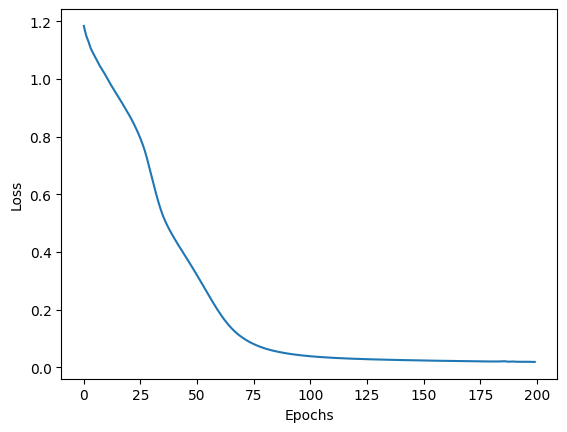

In [22]:
### graph it out
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [23]:
### evaluate model on test data set
with torch.no_grad(): ### turn off back propogation
  y_eval = model.forward(X_test) ## X_test are features from test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) ###  find the loss or error

In [24]:
loss

tensor(0.1718)

In [25]:
correct = 0
with torch.no_grad():
  for i, pred in enumerate(X_test):
    y_val = model.forward(pred) ### predict on by on

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    ### will tell us what type of flower class our network thinks it is
    print(f"{i+1}.{str(y_val)} \t {y_test[i]}, {x}")

    ### correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f"we got correct: {correct} out of {len(y_test)}")

1.tensor([-11.0422,   4.0210,   9.0567]) 	 2, Virginica
2.tensor([-15.9097,   2.7789,  15.7651]) 	 2, Virginica
3.tensor([-16.8997,   3.7433,  16.1203]) 	 2, Virginica
4.tensor([-4.1124,  6.8263, -1.4799]) 	 1, Versicolor
5.tensor([-13.9714,   3.9114,  12.5424]) 	 2, Virginica
6.tensor([-1.1363,  7.0342, -5.2710]) 	 1, Versicolor
7.tensor([-10.0507,   4.6941,   7.2031]) 	 2, Virginica
8.tensor([-3.8076,  6.8880, -2.0198]) 	 1, Versicolor
9.tensor([-12.0589,   4.2630,   9.8102]) 	 2, Virginica
10.tensor([-16.9341,   2.9259,  16.7963]) 	 2, Virginica
11.tensor([-9.4654,  4.8286,  6.3284]) 	 2, Virginica
12.tensor([ 15.5975,   7.9682, -26.8400]) 	 0, Setosa
13.tensor([ 13.9292,   7.0964, -23.9660]) 	 0, Setosa
14.tensor([ 0.5917,  6.0888, -6.5254]) 	 1, Versicolor
15.tensor([ 13.7116,   7.6603, -24.2982]) 	 0, Setosa
16.tensor([-8.5999,  5.4125,  4.9551]) 	 2, Virginica
17.tensor([ 14.6496,   7.4961, -25.2479]) 	 0, Setosa
18.tensor([-10.6426,   4.3309,   8.2064]) 	 1, Versicolor
19.tenso

In [26]:
new_Iris = torch.tensor([5.6, 3.0, 4.5, 1.5])

In [27]:
with torch.no_grad():
  print(model.forward(new_Iris))

tensor([-5.6411,  5.7572,  1.1243])


In [28]:
new_Iris_2 = torch.tensor([6.7, 3.0, 5.2, 0.1])

In [29]:
with torch.no_grad():
  print(model.forward(new_Iris_2))

tensor([ 1.2010,  8.3552, -9.1342])


In [30]:
### sace our NN model
torch.save(model.state_dict(), "iris_model.pt")

In [31]:
### load the saved model
new_model = Model()
new_model.load_state_dict(torch.load("iris_model.pt"))

<ipython-input-31-eeb82d5b8145>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("iris_model.pt"))


<All keys matched successfully>

In [32]:
# Make sure it loaded correct
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)